<a href="https://colab.research.google.com/github/psyzhao0122/Final-Assignment_Psych-Research/blob/main/Final_Assignment_ZiqingZhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data & Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/psyzhao0122/Final-Assignment_Psych-Research/main/religion-survey-results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 48 columns):
 #   Column                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                           --------------  ----- 
 0   What is your present religion, if any?                                                                                                                                                                           1040 non-null   object
 1   Unnamed: 1                                                                                                                                                                       

In [5]:
df.head()

,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Response,None of these,Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very comfortable,Somewhat comfortably,Very comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,NaN,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,NaN,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,...,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic


# Cleaning and pre-processing the data

In [6]:
df_clean = df.drop(df.columns[14:44], axis = 1)
df_clean = df_clean.drop(df_clean.columns[1], axis = 1) ##removing the unnamed column
df_clean.drop(df_clean.index[0], inplace = True) ##removing the first row with "response"
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 1 to 1039
Data columns (total 17 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   What is your present religion, if any?                                                                                                    1039 non-null   object
 1   Do you consider yourself to be an evangelical?                                                                                            920 non-null    object
 2   Do you attend religious services                                                                                                          926 non-null    object
 3   How often do you: Pray in public with visible motions (sig

In [7]:
df_clean.rename(columns = {
    'What is your present religion, if any?':'Present Religion',
    'Do you consider yourself to be an evangelical?':'Evangelical Identity',
    'Do you attend religious services': 'Attend religious services',
    'How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)': 'Pray in public with visible motions',
    'How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)': 'Pray in public using physical object',
    "How often do you: Pray aloud before meals in the presence of people who don't belong to your religion": 'Pray aloud before meals in the presence of people',
    "How often do you: Tell someone you'll pray for him or her": "Tell someone you'll pray for them",
    'How often do you: Ask or offer to pray with someone':'Ask or offer to pray with someone',
    'How often do you: Bring up your religion, unprompted, in conversation':'Bring up your religion',
    'How often do you: Ask others about their religion, unprompted, in conversation':'Ask others about their religion',
    'How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)':'Decline some kind of food/beverage for religious reasons',
    'How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)':'Wear religious clothing/jewelry',
    'How often do you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)':'Participate in a public religious event',
    'What is your age?':'Age',
    'What is your gender?':'Gender',
    'How much total combined money did all members of your HOUSEHOLD earn last year?':'Household Income'
}, inplace = True)

df_clean.head()


,Present Religion,Evangelical Identity,Attend religious services,Pray in public with visible motions,Pray in public using physical object,Pray aloud before meals in the presence of people,Tell someone you'll pray for them,Ask or offer to pray with someone,Bring up your religion,Ask others about their religion,Decline some kind of food/beverage for religious reasons,Wear religious clothing/jewelry,Participate in a public religious event,Age,Gender,Household Income,US Region
1,None of these,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,A few times per month,Once a year or less,A few times per week,Once a year or less,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,Once a month or less,Never,Once a month or less,Never,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,Once a year or less,Every day,Every day,Once a month or less,18 - 29,Male,"$0 to $9,999",South Atlantic
5,None of these,No,Weekly or more,Never,Never,Never,Once a month or less,A few times per month,Once a month or less,Once a year or less,Never,Never,Never,18 - 29,Male,"$75,000 to $99,999",Pacific


In [8]:
df_clean['Present Religion'].value_counts(normalize = True).sort_index()

,proportion
Present Religion,
Agnostic,0.118383
Atheist,0.106833
Buddhist,0.013474
Hindu,0.005775
Jewish,0.039461
Mormon,0.011550
Muslim,0.010587
None of these,0.232916
Orthodox Christian,0.051011


In [ ]:
df_clean['Age'].value_counts(normalize = True).sort_index()

,proportion
Age,
18 - 29,0.211742
30 - 44,0.263715
45 - 59,0.269490
60+,0.255053


In [9]:
df_clean['Gender'].value_counts()

,count
Gender,
Female,548
Male,491


In [10]:
df_clean['Household Income'].value_counts().sort_index()

,count
Household Income,
"$0 to $9,999",93
"$10,000 to $24,999",99
"$100,000 to $124,999",91
"$125,000 to $149,999",59
"$150,000 to $174,999",39
"$175,000 to $199,999",15
"$200,000 and up",57
"$25,000 to $49,999",178
"$50,000 to $74,999",160


In [11]:
df_clean['US Region'].value_counts(normalize = True).sort_index()

,proportion
US Region,
East North Central,0.175439
East South Central,0.052632
Middle Atlantic,0.131579
Mountain,0.072125
New England,0.065302
Pacific,0.146199
South Atlantic,0.191033
West North Central,0.071150
West South Central,0.094542


In [12]:
print(df_clean['Pray in public with visible motions'].value_counts().sort_index(), '\n')
print(df_clean['Participate in a public religious event'].value_counts().sort_index())

Pray in public with visible motions
A few times per month                      76
A few times per week                       77
Every day                                 108
Never                                     386
Not applicable to my religious beliefs    136
Once a month or less                       65
Once a year or less                        77
Name: count, dtype: int64 

Participate in a public religious event
A few times per month                      13
A few times per week                        8
Every day                                  13
Never                                     635
Not applicable to my religious beliefs     99
Once a month or less                       27
Once a year or less                       130
Name: count, dtype: int64


In [13]:
print(df_clean['Attend religious services'].value_counts().sort_index())

Attend religious services
Less than weekly    331
Never               354
Weekly or more      241
Name: count, dtype: int64


In [14]:
print(df_clean['Present Religion'].value_counts().sort_index())

Present Religion
Agnostic              123
Atheist               111
Buddhist               14
Hindu                   6
Jewish                 41
Mormon                 12
Muslim                 11
None of these         242
Orthodox Christian     53
Protestant            234
Roman Catholic        192
Name: count, dtype: int64


In [15]:
##recoding frequency columns
columns_to_recode = df_clean.columns[3:13]

recoding = {
    'Every day': 6,
    'A few times per week': 5,
    'A few times per month': 4,
    'Once a month or less': 3,
    'Once a year or less': 2,
    'Never': 1,
    "Not applicable to my religious beliefs": 0
}

df_clean[columns_to_recode] = df_clean[columns_to_recode].replace(recoding)

##recoding the Evangelical Identity column
df_clean.iloc[:, 1] = df_clean.iloc[:, 1].replace({
    'Yes': 1,
    'No': 0
})

##recoding the Attend religious services column
df_clean.iloc[:, 2] = df_clean.iloc[:, 2].replace({
    'Never': 0,
    'Less than weekly': 1,
    'Weekly or more': 2
})

/tmp/ipython-input-15-1703903722.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[columns_to_recode] = df_clean[columns_to_recode].replace(recoding)
/tmp/ipython-input-15-1703903722.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.iloc[:, 1] = df_clean.iloc[:, 1].replace({
/tmp/ipython-input-15-1703903722.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

In [16]:
print(df_clean.head(10))

   Present Religion Evangelical Identity Attend religious services  \
1     None of these                  0.0                       2.0   
2           Atheist                  NaN                       NaN   
3        Protestant                  0.0                       2.0   
4            Muslim                  0.0                       2.0   
5     None of these                  0.0                       2.0   
6     None of these                  0.0                       1.0   
7     None of these                  0.0                       0.0   
8        Protestant                  1.0                       1.0   
9     None of these                  0.0                       0.0   
10       Protestant                  0.0                       2.0   

    Pray in public with visible motions  Pray in public using physical object  \
1                                   5.0                                   0.0   
2                                   NaN                            

In [17]:
##filling missing values with the mode for in those columns
columns_to_fill = df_clean.columns[1:13]
for col in columns_to_fill:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

/tmp/ipython-input-17-3707517695.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
/tmp/ipython-input-17-3707517695.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


# Statistical Analyses

## Chi-square Test

In [18]:
#To examine whether there are significant differences of religious servive frequency between different religious people.
from scipy.stats import chi2_contingency

crosstabtable = pd.crosstab(df_clean['Present Religion'], df_clean['Attend religious services'])
#chi-square test
chi, p, df, expected = chi2_contingency(crosstabtable)

print("The crosstabl is：")
print(crosstabtable)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {df}")
print(f"Expected frequency table: \n{expected}")
#significance test
if p < 0.05:
    print("\nConclusion: Reject the null hypothesis: There is a significant difference between Present Religion and Attending religious services.")
    # calculate standardized residuls
    residuals = (crosstabtable - expected) / np.sqrt(expected)

    print("\nStandardized Residuals: \n", residuals)

    significant_residuals = residuals[np.abs(residuals) > 2]
    print("\nSignificant Residuals (greater than 2 or less than -2):\n", significant_residuals)
else:
    print("\nConclusion: The null hypothesis cannot be rejected: there is no significant difference between Present Religion and Attending religious services.")

The crosstabl is：
Attend religious services  0.0  1.0  2.0
Present Religion                        
Agnostic                   106   16    1
Atheist                    111    0    0
Buddhist                     8    5    1
Hindu                        4    1    1
Jewish                      14   22    5
Mormon                       0    2   10
Muslim                       0    4    7
None of these              116   82   44
Orthodox Christian          10   25   18
Protestant                  52   87   95
Roman Catholic              46   87   59

Chi-square test results:
Chi-square statistic: 385.01506858457344
P-value: 2.6060681186274535e-69
Degrees of freedom: 20
Expected frequency table: 
[[ 55.28488932  39.18479307  28.53031761]
 [ 49.89124158  35.36188643  25.74687199]
 [  6.29258903   4.46005775   3.24735322]
 [  2.69682387   1.91145332   1.39172281]
 [ 18.42829644  13.06159769   9.51010587]
 [  5.39364774   3.82290664   2.78344562]
 [  4.94417709   3.50433109   2.55149182]
 [108.

In [20]:
#To examine whether there are significant differences of religious servive frequency on people with different belief about evangelical identity.
from scipy.stats import chi2_contingency

crosstabtable = pd.crosstab(df_clean['Evangelical Identity'], df_clean['Attend religious services'])
#chi-square test
chi, p, df, expected = chi2_contingency(crosstabtable)

print("The crosstabl is：")
print(crosstabtable)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {df}")
print(f"Expected frequency table: \n{expected}")
#significance test
if p < 0.05:
    print("\nConclusion: Reject the null hypothesis: There is a significant difference between Evangelical Identity and Attending religious services.")
    # calculate standardized residuls
    residuals = (crosstabtable - expected) / np.sqrt(expected)

    print("\nStandardized Residuals: \n", residuals)

    significant_residuals = residuals[np.abs(residuals) > 2]
    print("\nSignificant Residuals (greater than 2 or less than -2):\n", significant_residuals)
else:
    print("\nConclusion: The null hypothesis cannot be rejected: there is no significant difference between Evangelical Identity and Attending religious services.")

The crosstabl is：
Attend religious services  0.0  1.0  2.0
Evangelical Identity                    
0.0                        456  281  144
1.0                         11   50   97

Chi-square test results:
Chi-square statistic: 177.02627092475362
P-value: 3.62437972887885e-39
Degrees of freedom: 2
Expected frequency table: 
[[395.98363811 280.66506256 204.35129933]
 [ 71.01636189  50.33493744  36.64870067]]

Conclusion: Reject the null hypothesis: There is a significant difference between Evangelical Identity and Attending religious services.

Standardized Residuals: 
 Attend religious services       0.0       1.0       2.0
Evangelical Identity                                   
0.0                        3.015998  0.019993 -4.221803
1.0                       -7.121811 -0.047209  9.969132

Significant Residuals (greater than 2 or less than -2):
 Attend religious services       0.0  1.0       2.0
Evangelical Identity                              
0.0                        3.015998  N

In [21]:
#To examine whether there are significant differences of religious servive frequency on male and female people
from scipy.stats import chi2_contingency

crosstabtable = pd.crosstab(df_clean['Gender'], df_clean['Attend religious services'])
#chi-square test
chi, p, df, expected = chi2_contingency(crosstabtable)

print("The crosstabl is：")
print(crosstabtable)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {df}")
print(f"Expected frequency table: \n{expected}")
#significance test
if p < 0.05:
    print("\nConclusion: Reject the null hypothesis: There is a significant difference between Gender and Attending religious services.")
    # calculate standardized residuls
    residuals = (crosstabtable - expected) / np.sqrt(expected)

    print("\nStandardized Residuals: \n", residuals)

    significant_residuals = residuals[np.abs(residuals) > 2]
    print("\nSignificant Residuals (greater than 2 or less than -2):\n", significant_residuals)
else:
    print("\nConclusion: The null hypothesis cannot be rejected: there is no significant difference between Gender and Attending religious services.")

The crosstabl is：
Attend religious services  0.0  1.0  2.0
Gender                                  
Female                     233  192  123
Male                       234  139  118

Chi-square test results:
Chi-square statistic: 5.481733564553864
P-value: 0.06451440271008196
Degrees of freedom: 2
Expected frequency table: 
[[246.30991338 174.57940327 127.11068335]
 [220.69008662 156.42059673 113.88931665]]

Conclusion: The null hypothesis cannot be rejected: there is no significant difference between Gender and Attending religious services.


# Visualizations

## Bar Charts

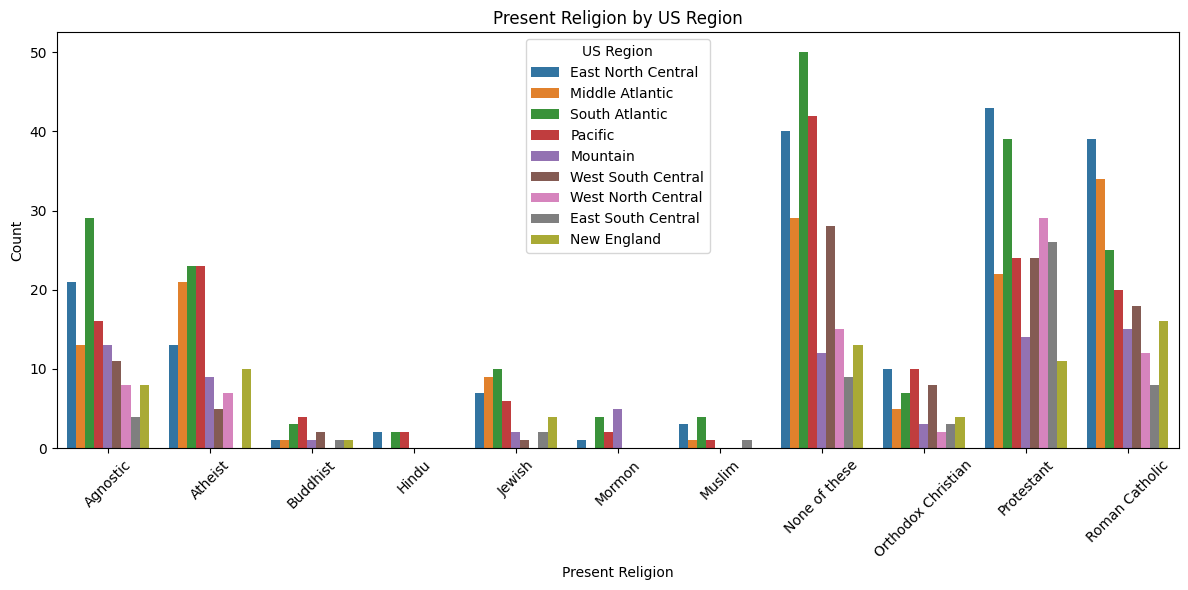

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.countplot(data=df_clean, x="Present Religion", hue="US Region", order=sorted(df_clean["Present Religion"].dropna().unique()))

plt.xticks(rotation=45)
plt.title("Present Religion by US Region")
plt.xlabel("Present Religion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


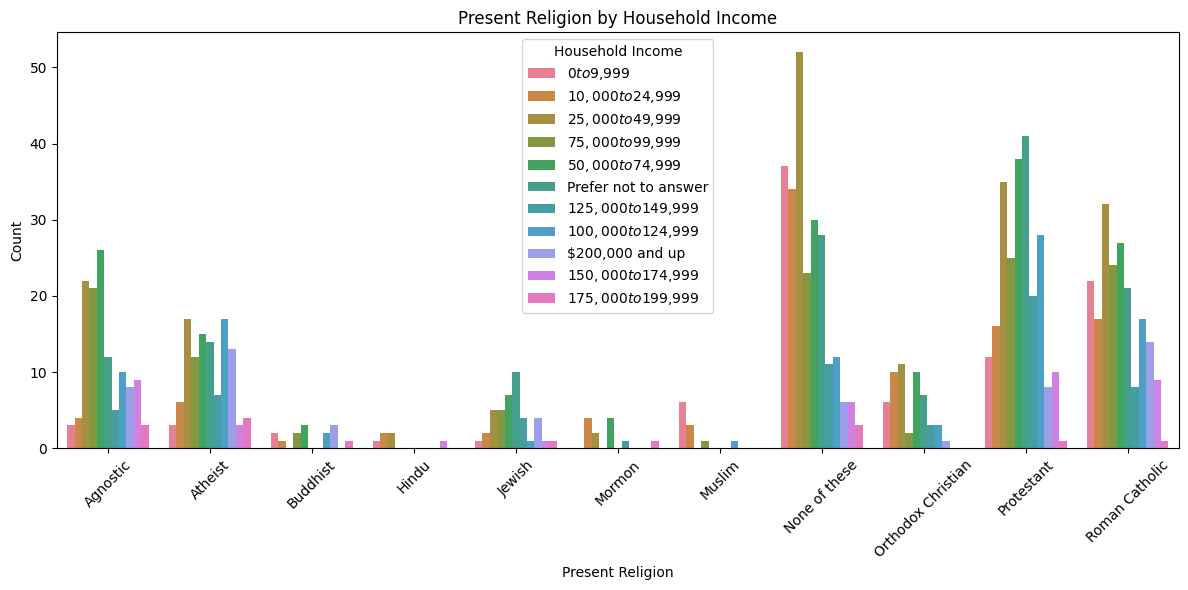

In [30]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_clean,
    x="Present Religion",
    hue="Household Income",
    order=sorted(df_clean["Present Religion"].dropna().unique())
)

plt.xticks(rotation=45)
plt.title("Present Religion by Household Income")
plt.xlabel("Present Religion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


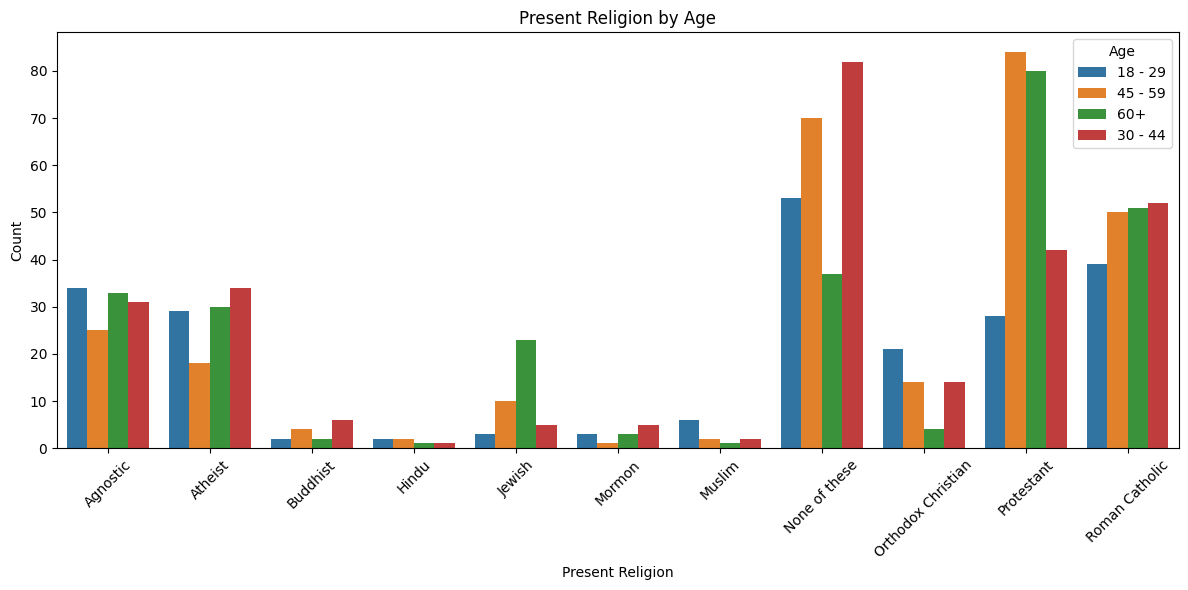

In [31]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_clean,
    x="Present Religion",
    hue="Age",
    order=sorted(df_clean["Present Religion"].dropna().unique())
)

plt.xticks(rotation=45)
plt.title("Present Religion by Age")
plt.xlabel("Present Religion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Correlation Matrix

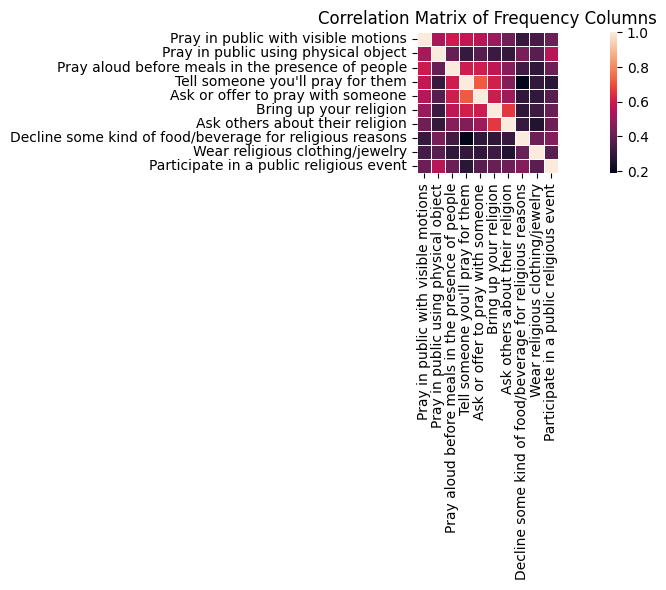

In [35]:
plt.figure(figsize=(12, 6))

sns.heatmap(
    corr_mat,
    xticklabels=corr_mat.columns, # show column names on x-axis
    yticklabels=corr_mat.index,   # show row names on y-axis
    square=True,                   # make each cell square
    linewidths=0.5,                # space between cells
)

plt.title("Correlation Matrix of Frequency Columns")
plt.tight_layout()
plt.show()


## Boxplot

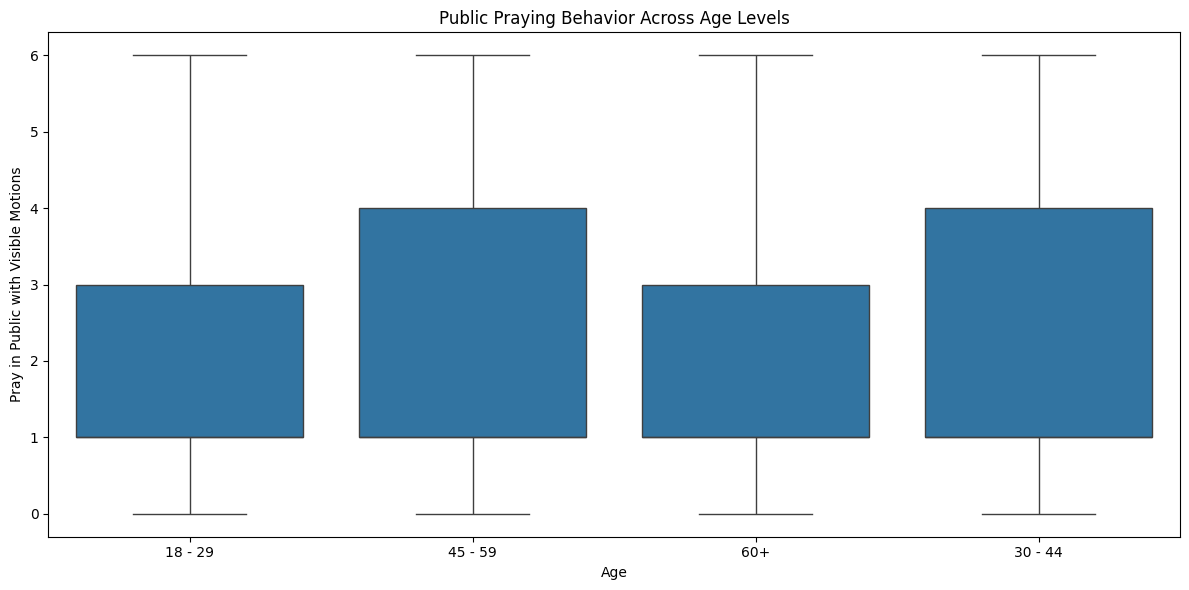

In [36]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_clean,
    x="Age",
    y="Pray in public with visible motions",
)

plt.title("Public Praying Behavior Across Age Levels")
plt.xlabel("Age")
plt.ylabel("Pray in Public with Visible Motions")

plt.tight_layout()
plt.show()


/tmp/ipython-input-38-872674307.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




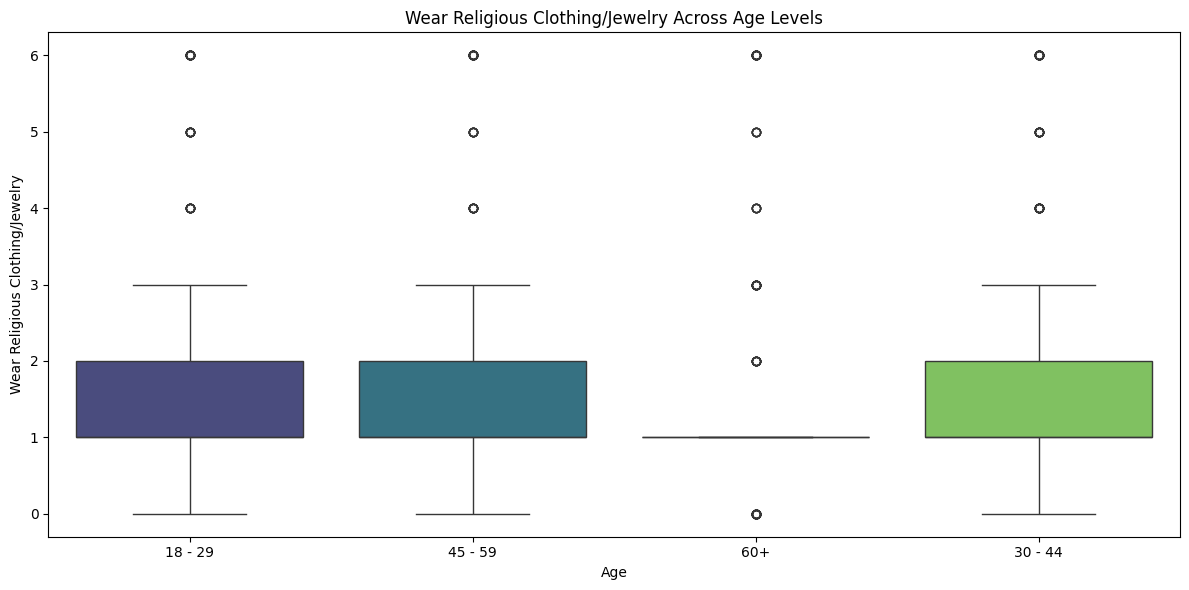

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot: Wear religious clothing/jewelry vs Age
sns.boxplot(
    data=df_clean,
    x="Age",
    y="Wear religious clothing/jewelry",
    palette="viridis"  # optional: choose a color theme
)

plt.title("Wear Religious Clothing/Jewelry Across Age Levels")
plt.xlabel("Age")
plt.ylabel("Wear Religious Clothing/Jewelry")

plt.tight_layout()
plt.show()
